<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/1CMR8SvZWQa31_aMOpJBys5LVNakbGsRV/view?usp=sharing



https://drive.google.com/file/d/1vug2SdRcH9aj831C3RQymHBnykCmzzNI/view?usp=drive_link

https://www.kaggle.com/code/miroslavkirnak/ufc-eda-and-prediction/notebook

https://www.kaggle.com/code/gurharkhalsa/most-accurate-fighter-pred

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(14, 6))

sns.set(font_scale=1.5)

<Figure size 1400x600 with 0 Axes>

# predict

https://www.kaggle.com/datasets/martj42/mma-fight-predictions-by-professional-fighters

The data is gathered mostly from James Lynch's YouTube channel, where fighters are asked to predict upcoming fights. Currently, the dataset includes 2,552 made predictions of 244 fights since the end of 2015 up to today.
https://www.youtube.com/channel/UCsK80SSNnnGkb2pwPgblMsA

In [ ]:
!gdown --id 1nJDGvxwSBtWJu04_ZPRuMvaaD6ouncXF

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nJDGvxwSBtWJu04_ZPRuMvaaD6ouncXF
To: /content/predictions.csv
100% 219k/219k [00:00<00:00, 7.65MB/s]


In [ ]:
df = pd.read_csv('/content/predictions.csv')

In [ ]:
df.head(3)

,winner,loser,date,winner_odds,predictor,correct
0,Conor McGregor,Jose Aldo,2015-12-12,-104.0,Andrei Arlovski,False
1,Conor McGregor,Jose Aldo,2015-12-12,-104.0,Alexander Gustafsson,True
2,Conor McGregor,Jose Aldo,2015-12-12,-104.0,Travis Browne,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winner       3401 non-null   object 
 1   loser        3401 non-null   object 
 2   date         3401 non-null   object 
 3   winner_odds  3401 non-null   float64
 4   predictor    3401 non-null   object 
 5   correct      3401 non-null   bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 136.3+ KB


In [ ]:
df.describe()

,winner_odds
count,3401.000000
mean,-128.183011
std,302.968404
min,-1564.000000
25%,-266.000000
50%,-142.000000
75%,132.560000
max,481.000000


In [ ]:
dfcat = df.drop('winner_odds', axis =1)

In [ ]:
dfcat.describe()

,winner,loser,date,predictor,correct
count,3401,3401,3401,3401,3401
unique,116,161,183,460,2
top,Khabib Nurmagomedov,Conor McGregor,2021-03-06,Stephen Thompson,True
freq,143,142,179,85,1844


In [ ]:
df.groupby('correct').count()

,winner,loser,date,winner_odds,predictor
correct,,,,,
False,1557,1557,1557,1557,1557
True,1844,1844,1844,1844,1844


<Axes: >

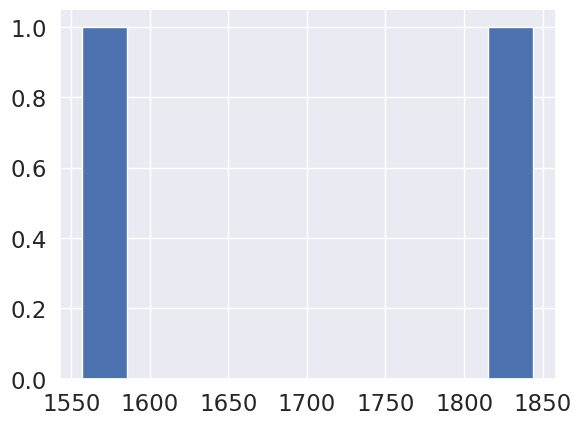

In [ ]:
df.groupby('correct').count()['winner'].hist()

<Axes: ylabel='winner'>

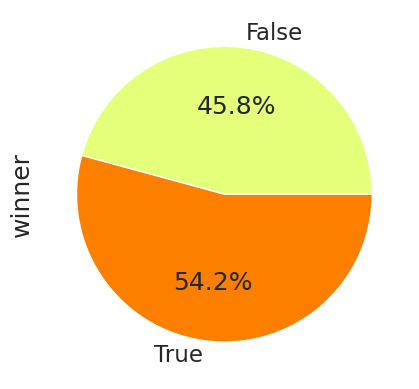

In [ ]:
df.groupby('correct').count()['winner'].plot(kind= 'pie', y='correct', autopct="%.1f%%", colormap='Wistia')

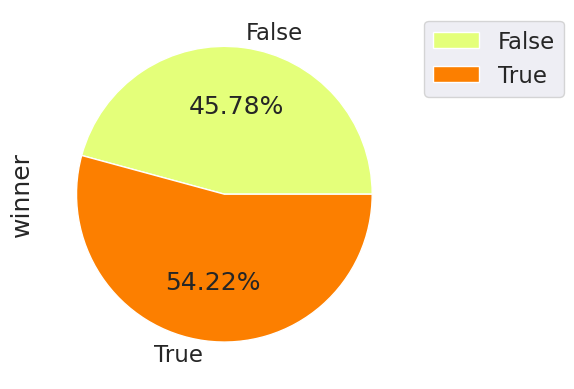

In [ ]:
df.groupby('correct').count()['winner'].plot(kind= 'pie', y='attendees',autopct="%.2f%%", colormap='Wistia').legend(bbox_to_anchor= (1.01, 1))

In [ ]:
df['type'] = df['correct'].astype('category')

## kaggle version

In [ ]:
predictors = {}
total_right = 0
total = 0
for i, obj in df.iterrows():
    if obj["predictor"] not in predictors:
        if obj["correct"] == True:
            predictors[obj["predictor"]] = [1, 0]
            total_right += 1
            total += 1
        else:
            predictors[obj["predictor"]] = [0, 1]
            total += 1
    else:
        # if in predictors dict and correct prediction
        if obj["correct"] == True:
            predictors[obj["predictor"]][0] += 1
            total_right += 1
            total += 1
        else:
            predictors[obj["predictor"]][1] += 1
            total += 1

max_corr_pred_fighter = ""
max_pred = 0
for pred in predictors.keys():

    if predictors[pred][0] > max_pred:
        max_pred = predictors[pred][0]
        max_corr_pred_fighter = pred

print("overall fighter prediction accuracy = ", total_right/total)
print("fighter with most correct predictions = ", max_corr_pred_fighter)

overall fighter prediction accuracy =  0.5421934725080858
fighter with most correct predictions =  Stephen Thompson


In [ ]:
for pred in predictors.keys():
    if predictors[pred][0] + predictors[pred][1] < 10:
        predictors[pred] = 0
    else:
        predictors[pred] = predictors[pred][0]/(predictors[pred][0] + predictors[pred][1])

In [ ]:
import operator
sorted_pred = sorted(predictors.items(), key=operator.itemgetter(1), reverse=True)
for pred in sorted_pred:
    if pred[0] == "Stephen Thompson":
        print("Stephen Thompson's Accuracy: ",pred[1])

Stephen Thompson's Accuracy:  0.5411764705882353


In [ ]:
top_predictors = sorted_pred[:30]

In [ ]:
top_predictors

[('Jared Gordon', 0.8823529411764706),
 ('Mike Rhodes', 0.8),
 ('Eddie Alvarez', 0.8),
 ('Alexander Volkanovski', 0.7333333333333333),
 ('Misha Cirkunov', 0.7272727272727273),
 ('Matt Schnell', 0.7058823529411765),
 ('Vicente Luque', 0.7058823529411765),
 ('Joe Duffy', 0.6923076923076923),
 ('Renato Moicano', 0.6875),
 ('Cynthia Calvillo', 0.6842105263157895),
 ('Dominick Reyes', 0.6764705882352942),
 ('Marion Reneau', 0.6666666666666666),
 ('Gillian Robertson', 0.6666666666666666),
 ('Randa Markos', 0.65),
 ('Ian Heinisch', 0.6470588235294118),
 ('Randy Brown', 0.6428571428571429),
 ('Jason Knight', 0.6428571428571429),
 ('Pedro Munhoz', 0.6428571428571429),
 ('Marvin Vettori', 0.6363636363636364),
 ('Montana de la Rosa', 0.6363636363636364),
 ('Matt Frevola', 0.6363636363636364),
 ('Lando Vannata', 0.6363636363636364),
 ('Miranda Granger', 0.6363636363636364),
 ('Dwight Grant', 0.6153846153846154),
 ('Albert Morales', 0.6129032258064516),
 ('Volkan Oezdemir', 0.6111111111111112),
 ('

In [ ]:
predictors1 = dict(sorted(predictors.items(), key=lambda x: (x[1], x[0])))
predictors1

{'A.J. McKee': 0,
 'Aaron Pico': 0,
 'Abu Azaitar': 0,
 'Adam Milstead': 0,
 'Adrian Yanez': 0,
 'Aleksandar Rakic': 0,
 'Alex Morono': 0,
 'Alex Perez': 0,
 'Alexander Gustafsson': 0,
 'Alexander Volkov': 0,
 'Alexey Oleynik': 0,
 'Alexi Argyriou': 0,
 'Alexis Davis': 0,
 'Amanda Cooper': 0,
 'Amir Albazi': 0,
 'Andre Ewell': 0,
 'Andre Fili': 0,
 'Andre Soukhamthath': 0,
 'Andrei Arlovski': 0,
 'Andrew Sanchez': 0,
 'Andy Nguyen': 0,
 'Angela Lee': 0,
 'Anna Elmose': 0,
 'Anthony Gutierrez': 0,
 'Anthony Pettis': 0,
 'Arjan Bhullar': 0,
 'Artem Lobov': 0,
 'Ashlee Evans-Smith': 0,
 'Ashley Cummins': 0,
 'Austin Arnett': 0,
 'Austin Lingo': 0,
 'Austin Vanderford': 0,
 'Bea Malecki': 0,
 'Ben Nguyen': 0,
 'Ben Rothwell': 0,
 'Benson Henderson': 0,
 'Billy Quarantillo': 0,
 'Bobby Nash': 0,
 'Bobby Voelker': 0,
 'Bojan Velickovic': 0,
 'Brad Katona': 0,
 'Brad Pickett': 0,
 'Brad Tavares': 0,
 'Brandi Narvaez': 0,
 'Brandon Davis': 0,
 'Brandon Girtz': 0,
 'Brandon Moreno': 0,
 'Brando

In [ ]:
x, y = zip(*top_predictors)

<BarContainer object of 30 artists>

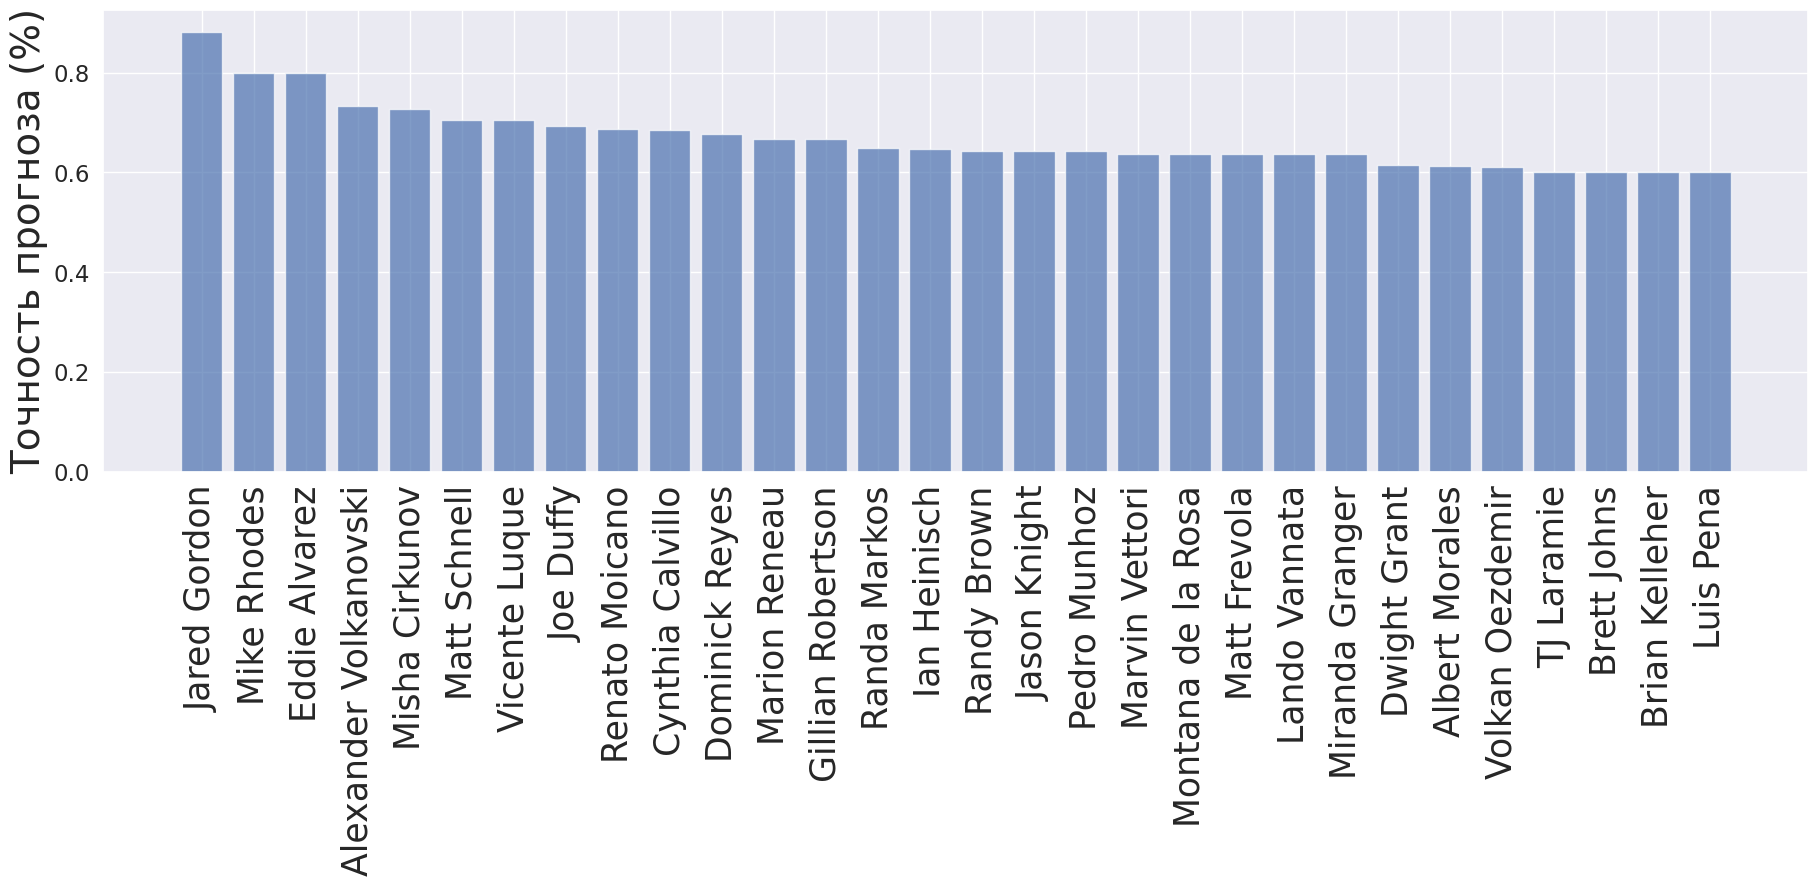

In [ ]:
plt.rcParams["figure.figsize"] = (22,6)
plt.xticks(rotation=90, fontsize=25)
plt.ylabel("Точность прогноза (%)", fontsize=28)
#plt.xlabel("Спортсмены", fontsize=28)
plt.bar(x, y, alpha=.7)

In [ ]:
df.columns

Index(['winner', 'loser', 'date', 'winner_odds', 'predictor', 'correct',
       'type'],
      dtype='object')

In [ ]:
dfac = df.groupby(['predictor', 'type']).count()['winner']
dfac = pd.DataFrame(dfac)
dfac

winner
predictor     type         
A.J. McKee    False       2
              True        0
Aaron Pico    False       1
              True        1
Abu Azaitar   False       0
...                     ...
Zach Makovsky True        1
Zak Cummings  False       6
              True        4
Zak Ottow     False       1
              True        8

[920 rows x 1 columns]

In [ ]:

pd.pivot_table(df,index=["predictor",  'correct'])

<ipython-input-29-05f299d33a35>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df,index=["predictor",  'correct'])


winner_odds
predictor     correct             
A.J. McKee    False    -237.500000
Aaron Pico    False    -201.000000
              True     -265.000000
Abu Azaitar   True     -190.000000
Adam Milstead False     139.000000
...                            ...
Zach Makovsky True     -221.000000
Zak Cummings  False       0.833333
              True     -144.000000
Zak Ottow     False    -166.000000
              True     -204.750000

[740 rows x 1 columns]

In [ ]:
df.groupby(['predictor']).count()['winner']


predictor
A.J. McKee          2
Aaron Pico          2
Abu Azaitar         1
Adam Milstead       6
Adam Townsend      21
                   ..
Yana Kunitskaya     1
Youssef Zalal       9
Zach Makovsky       2
Zak Cummings       10
Zak Ottow           9
Name: winner, Length: 460, dtype: int64

In [ ]:
df.groupby('predictor')['predictor'].count()

predictor
A.J. McKee          2
Aaron Pico          2
Abu Azaitar         1
Adam Milstead       6
Adam Townsend      21
                   ..
Yana Kunitskaya     1
Youssef Zalal       9
Zach Makovsky       2
Zak Cummings       10
Zak Ottow           9
Name: predictor, Length: 460, dtype: int64

In [ ]:
#dfac['freq'] = df.groupby('predictor')['predictor'].transform('count')
dfac

winner
predictor     type         
A.J. McKee    False       2
              True        0
Aaron Pico    False       1
              True        1
Abu Azaitar   False       0
...                     ...
Zach Makovsky True        1
Zak Cummings  False       6
              True        4
Zak Ottow     False       1
              True        8

[920 rows x 1 columns]

In [ ]:
dfac

winner
predictor     type         
A.J. McKee    False       2
              True        0
Aaron Pico    False       1
              True        1
Abu Azaitar   False       0
...                     ...
Zach Makovsky True        1
Zak Cummings  False       6
              True        4
Zak Ottow     False       1
              True        8

[920 rows x 1 columns]

In [ ]:
df1 = pd.get_dummies(df, columns = ['type'])

In [ ]:
dfres = df1.groupby('predictor').sum()
dfres = dfres.drop('correct', axis =1)
dfres['total']= dfres['type_False'] + dfres['type_True']
dfres['accurate'] = dfres['type_True']/dfres['total']
dfres

<ipython-input-35-2dfa75c4446b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfres = df1.groupby('predictor').sum()


,winner_odds,type_False,type_True,total,accurate
predictor,,,,,
A.J. McKee,-475.0,2,0,2,0.000000
Aaron Pico,-466.0,1,1,2,0.500000
Abu Azaitar,-190.0,0,1,1,1.000000
Adam Milstead,-21.0,2,4,6,0.666667
Adam Townsend,-2480.0,11,10,21,0.476190
...,...,...,...,...,...
Yana Kunitskaya,163.0,1,0,1,0.000000
Youssef Zalal,-1226.0,3,6,9,0.666667
Zach Makovsky,-30.0,1,1,2,0.500000


In [ ]:
df2 = dfres.sort_values(['total', 'accurate'],
              ascending = [False, False])
df2

,winner_odds,type_False,type_True,total,accurate
predictor,,,,,
Stephen Thompson,-10289.00,39,46,85,0.541176
Brian Kelleher,-11351.00,28,42,70,0.600000
Eryk Anders,-8044.09,31,36,67,0.537313
Curtis Blaydes,-8694.00,26,38,64,0.593750
Kevin Lee,-9039.73,28,35,63,0.555556
...,...,...,...,...,...
Tiffany van Soest,-305.00,1,0,1,0.000000
Vince Cachero,203.00,1,0,1,0.000000
Vitor Belfort,191.00,1,0,1,0.000000


In [ ]:
df3 = dfres.sort_values([ 'accurate','total'],
              ascending = [False, False])
df3

,winner_odds,type_False,type_True,total,accurate
predictor,,,,,
Patrick Cote,-2164.0,0,8,8,1.0
Kyle Daukaus,80.0,0,5,5,1.0
Olivier Aubin-Mercier,-785.0,0,5,5,1.0
Sijara Eubanks,-2675.0,0,5,5,1.0
Ray Borg,-753.0,0,4,4,1.0
...,...,...,...,...,...
Tiffany van Soest,-305.0,1,0,1,0.0
Vince Cachero,203.0,1,0,1,0.0
Vitor Belfort,191.0,1,0,1,0.0


In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df3, *[[['winner_odds', 'type_False'], ['type_False', 'type_True'], ['type_True', 'total'], ['total', 'accurate']]], **{})
chart

In [ ]:
dfres['type_False'].value_counts()[0]

102

In [ ]:
df0 = dfres[dfres['type_False']==0]
df0.sort_values(['total', 'accurate'],
              ascending = [False, False])

,winner_odds,type_False,type_True,total,accurate
predictor,,,,,
Patrick Cote,-2164.0,0,8,8,1.0
Kyle Daukaus,80.0,0,5,5,1.0
Olivier Aubin-Mercier,-785.0,0,5,5,1.0
Sijara Eubanks,-2675.0,0,5,5,1.0
Ray Borg,-753.0,0,4,4,1.0
...,...,...,...,...,...
Tom Lawlor,-277.0,0,1,1,1.0
Tony Kelley,-277.0,0,1,1,1.0
Tonya Evinger,-190.0,0,1,1,1.0


In [ ]:
df0['total'].unique()

array([1, 3, 2, 5, 8, 4], dtype=uint8)

In [ ]:
dfres[dfres['type_True']==0].index

Index(['A.J. McKee', 'Alexi Argyriou', 'Andrei Arlovski', 'Andy Nguyen',
       'Anthony Pettis', 'Bobby Voelker', 'Brad Tavares', 'Brandon Davis',
       'Brandon Girtz', 'Brooke Mayo', 'Bryce Mitchell', 'Christos Giagos',
       'Clay Guida', 'Collin Anglin', 'Cub Swanson', 'Daniel Spitz',
       'David Zawada', 'Demian Maia', 'Derrick Lewis', 'Desmond Green',
       'Emil Meek', 'Fabricio Werdum', 'Gabe Green', 'Gabriel Gonzaga',
       'Georgi Karakhanyan', 'Gina Mazany', 'Gunnar Nelson', 'Hunter Azure',
       'Jairzinho Rozenstruik', 'Jamall Emmers', 'Jeff Hughes',
       'Jeremiah Labiano', 'Jeremy May', 'Jeremy Stephens', 'Jessica Aguilar',
       'Jessica Rose-Clark', 'Jessica-Rose Clark', 'Jocelyn Jones-Lybarger',
       'John Castaneda', 'Jordan Rinaldi', 'Josh Koscheck', 'Julian Erosa',
       'Junior dos Santos', 'Justine Kish', 'Kate Jackson', 'Khaos Williams',
       'Kody Nordby', 'Kyle Nelson', 'Lanchana Green', 'Leonardo Santos',
       'Lerone Murphy', 'Liam McGeary'

In [ ]:
dfres[dfres['type_True']==1].index

Index(['Aaron Pico', 'Abu Azaitar', 'Alexander Volkov', 'Alexis Davis',
       'Andre Fili', 'Angela Lee', 'Anna Elmose', 'Anthony Gutierrez',
       'Ashlee Evans-Smith', 'Ashley Cummins',
       ...
       'Thiago Santos', 'Thomas Almeida', 'Tim Williams', 'Tom Lawlor',
       'Tony Kelley', 'Tonya Evinger', 'Travis Browne', 'Trevin Giles',
       'Trisha Cicero', 'Zach Makovsky'],
      dtype='object', name='predictor', length=122)

## кластерный анализ

In [ ]:

from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)

In [ ]:
X = dfres[['type_False', 'type_True', 'total', 'accurate']].copy()

In [ ]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

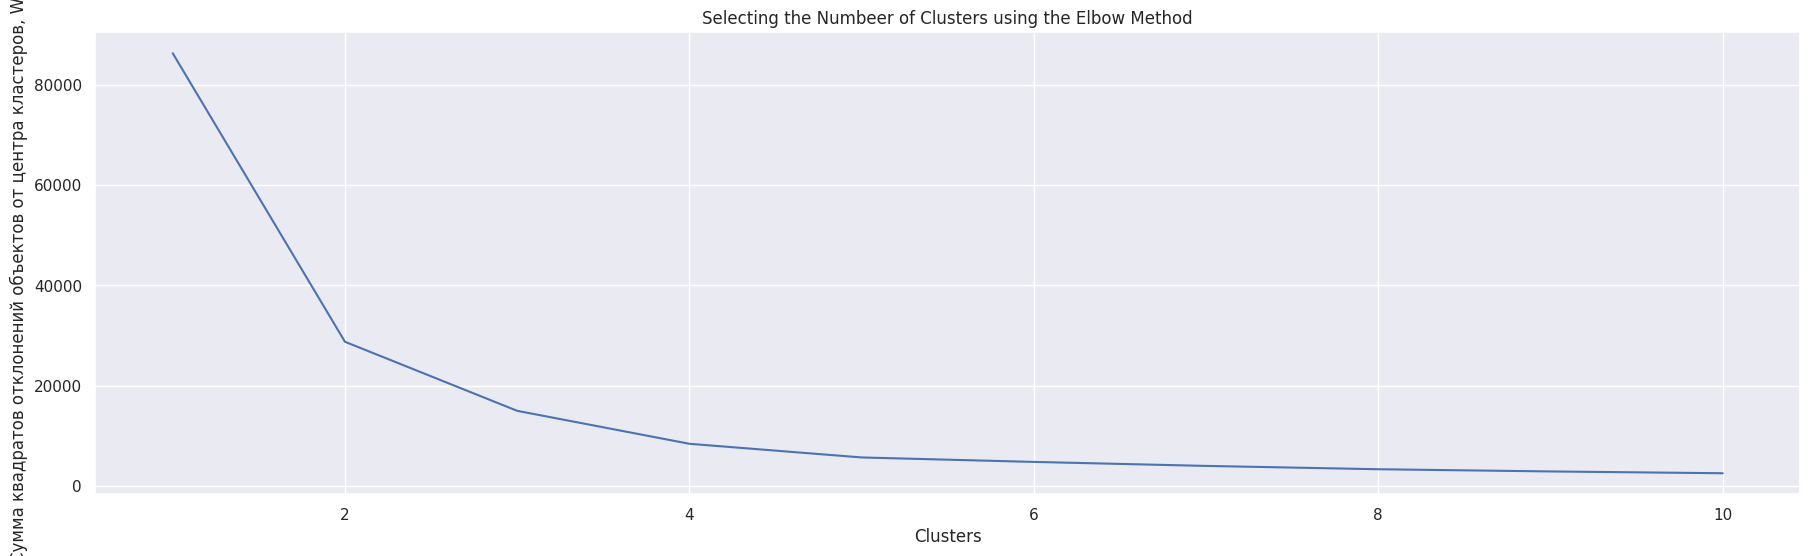

In [ ]:
wcss = []


for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


sns.set()

plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Сумма квадратов отклонений объектов от центра кластеров, WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

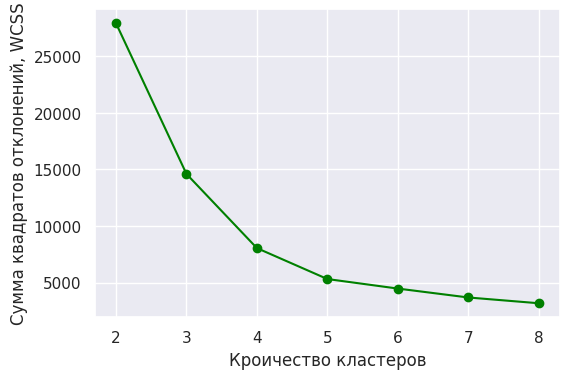

In [ ]:
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Кроичество кластеров")
plt.ylabel("Сумма квадратов отклонений, WCSS")
plt.show()

In [ ]:
dfres.columns

Index(['winner_odds', 'type_False', 'type_True', 'total', 'accurate'], dtype='object')

In [ ]:
X.columns

Index(['type_False', 'type_True', 'total', 'accurate'], dtype='object')

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(X)
X.insert(X.columns.get_loc("accurate"), "Cluster1", clusters)
X.head(3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,type_False,type_True,total,Cluster1,accurate
predictor,,,,,
A.J. McKee,2,0,2,2,0.0
Aaron Pico,1,1,2,2,0.5
Abu Azaitar,0,1,1,2,1.0


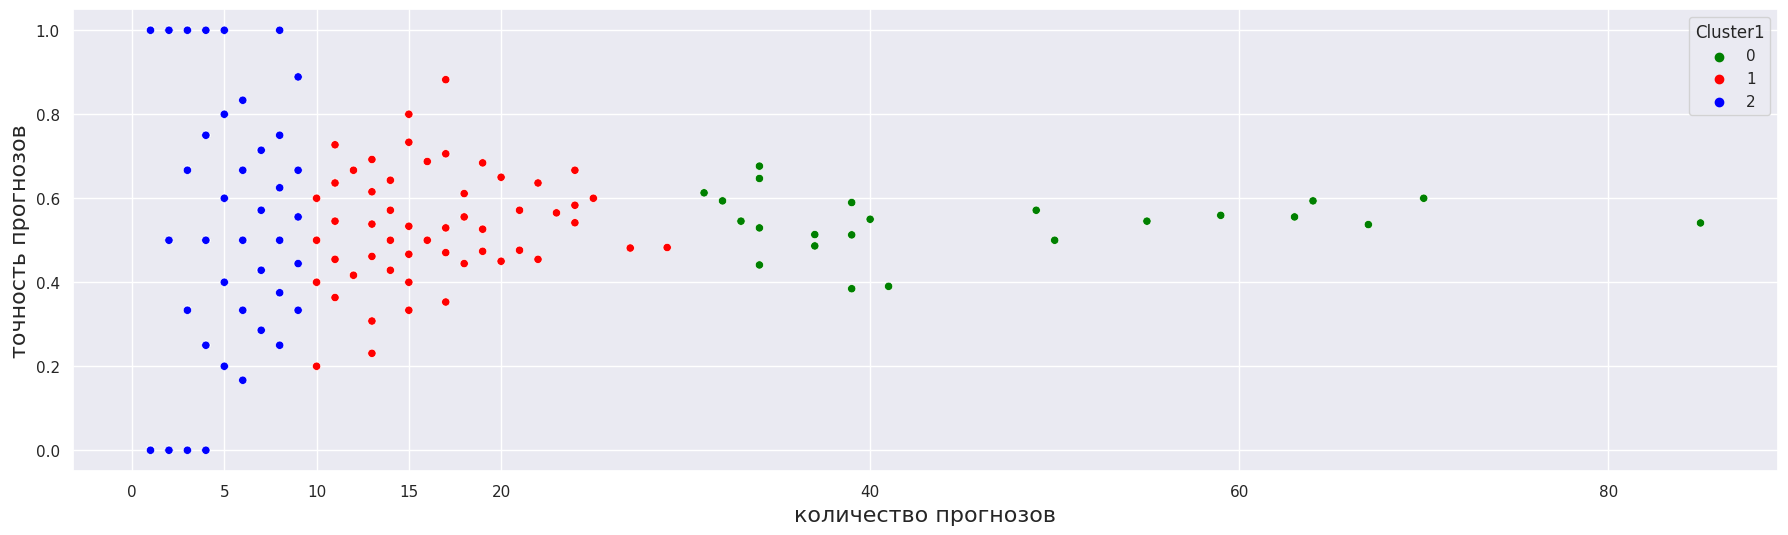

In [ ]:
sns.scatterplot(x="total", y="accurate",hue = 'Cluster1',  data=X, palette=['green','red','blue']).set_xticks([0, 5, 10, 15, 20, 40,60,80])
plt.ylabel("точность прогнозов").set_fontsize(16)
plt.xlabel("количество прогнозов").set_fontsize(16)

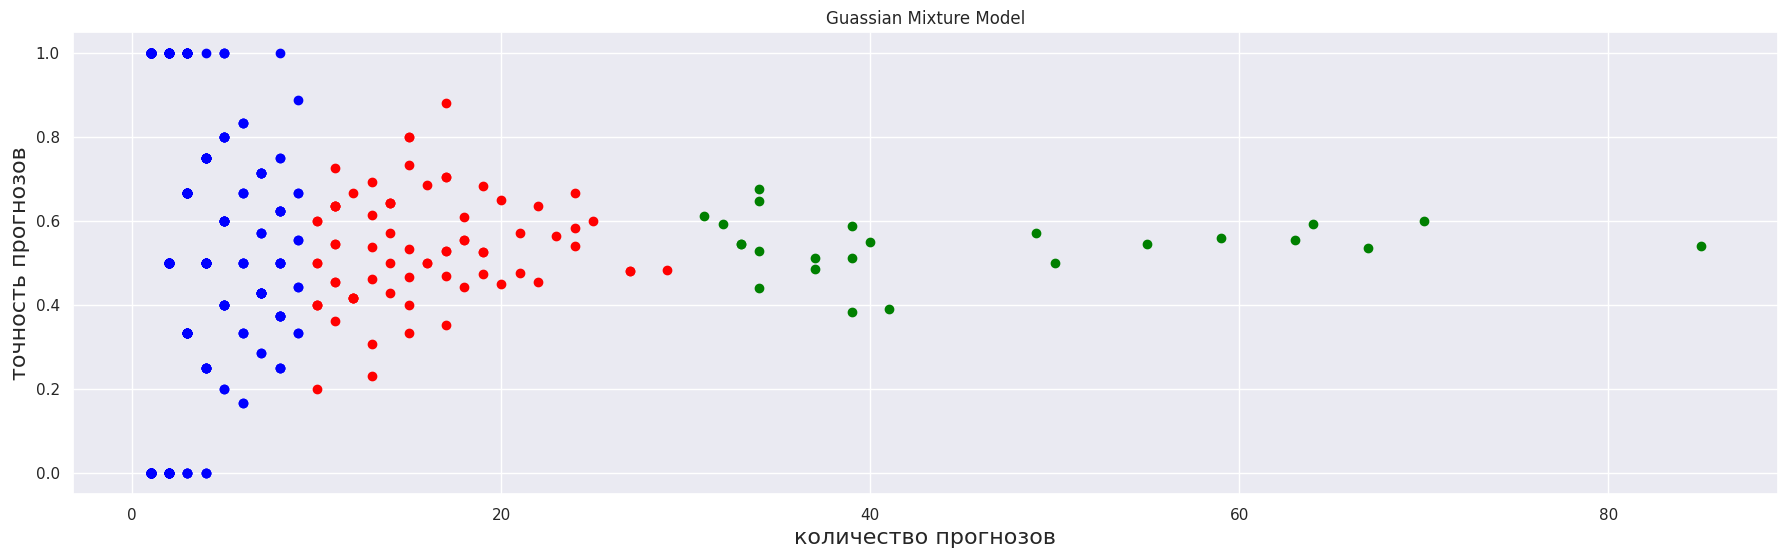

In [ ]:
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters, random_state=5)
gmm_model.fit(X)


cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['Cluster2'] = cluster_labels


color=['blue','green','red', 'black', 'yellow']
for k in range(0,n_clusters):
    data = X[X["Cluster2"]==k].copy()
    plt.scatter(data["total"],data["accurate"],c=color[k])

plt.title("Guassian Mixture Model")
plt.ylabel("точность прогнозов").set_fontsize(16)
plt.xlabel("количество прогнозов").set_fontsize(16)
plt.show()




Text(0.5, 1.0, 'Guassian Mixture Model')

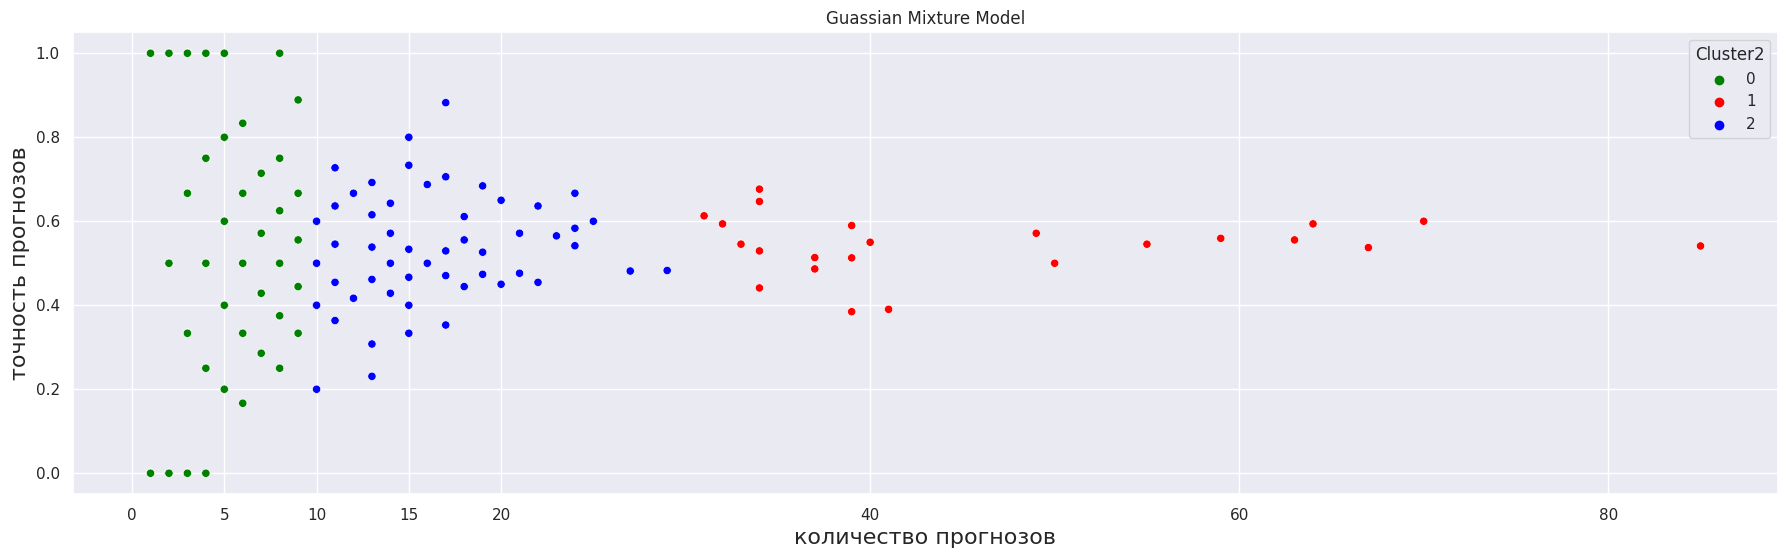

In [ ]:
sns.scatterplot(x="total", y="accurate",hue = 'Cluster2',  data=X, palette=['green','red','blue']).set_xticks([0, 5, 10, 15, 20, 40,60,80])
plt.ylabel("точность прогнозов").set_fontsize(16)
plt.xlabel("количество прогнозов").set_fontsize(16)
plt.title("Guassian Mixture Model")

[Text(0.5, 1.0, 'Spectral Clustering')]

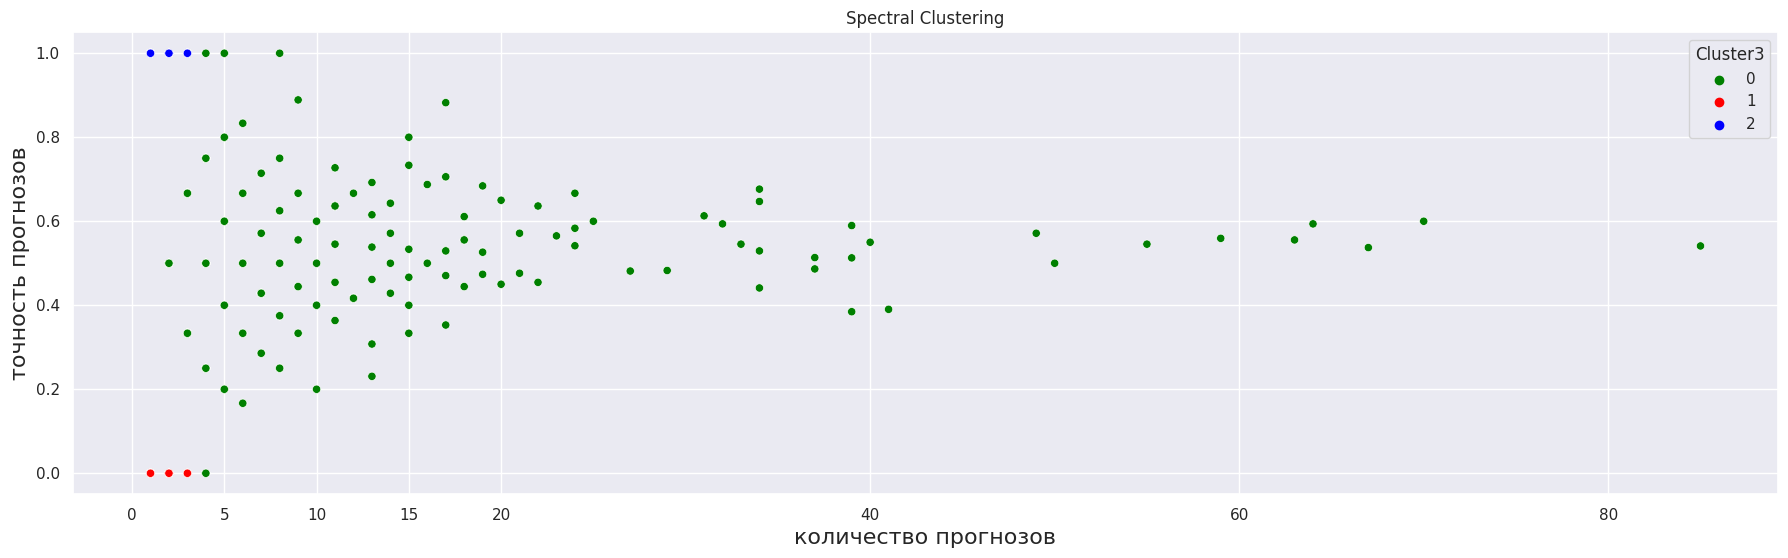

In [ ]:
from sklearn.cluster import SpectralClustering

spectral_cluster_model= SpectralClustering(
    n_clusters=3,
    random_state=64,
    n_neighbors=30,
    affinity='nearest_neighbors'
)


X['Cluster3'] = spectral_cluster_model.fit_predict(X)


fig, ax = plt.subplots()
sns.scatterplot(x='total', y='accurate', data=X, hue='Cluster3', ax=ax, palette=['green','red','blue']).set_xticks([0, 5, 10, 15, 20, 40,60,80])
plt.ylabel("точность прогнозов").set_fontsize(16)
plt.xlabel("количество прогнозов").set_fontsize(16)
ax.set(title='Spectral Clustering')

[Text(0.5, 1.0, 'Spectral Clustering')]

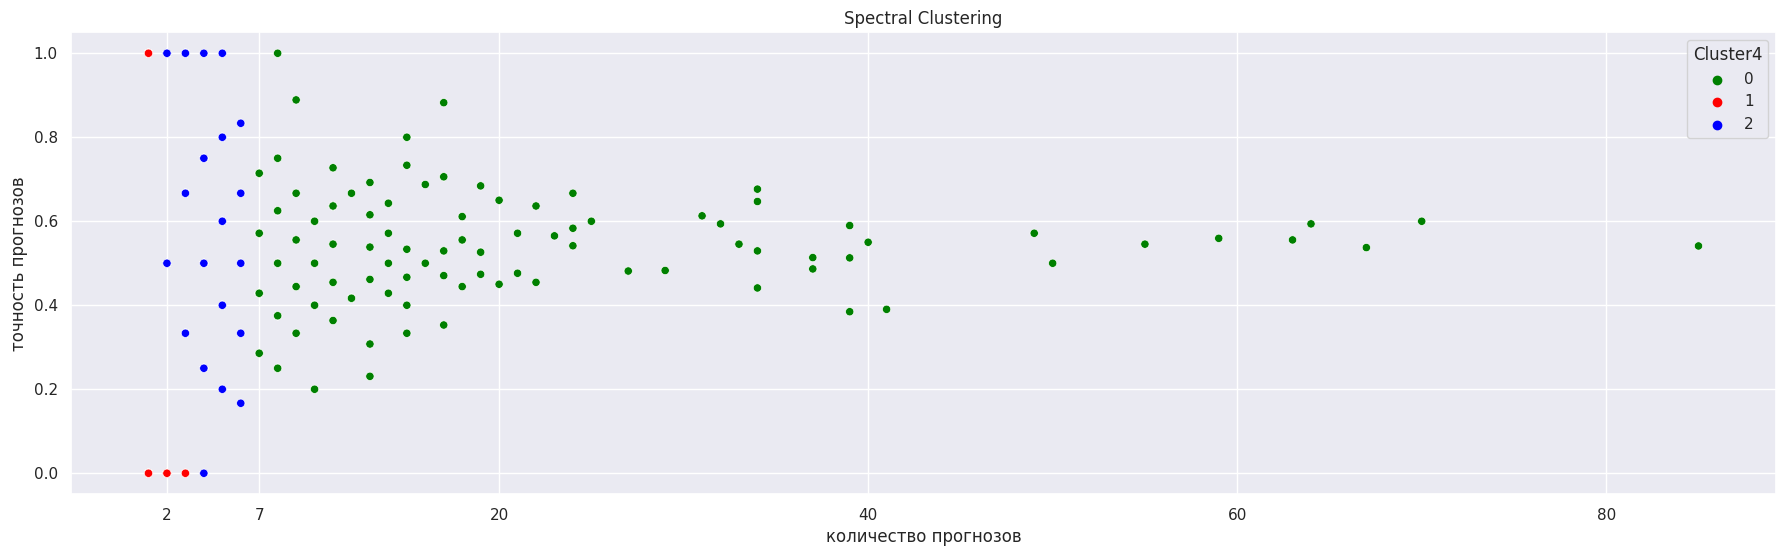

In [ ]:
from sklearn.cluster import SpectralClustering

spectral_cluster_model= SpectralClustering(
    n_clusters=3,
    random_state=64,
    n_neighbors=115,
    affinity='nearest_neighbors'
)


X['Cluster4'] = spectral_cluster_model.fit_predict(X)


fig, ax = plt.subplots()
sns.scatterplot(x='total', y='accurate', data=X, hue='Cluster4', ax=ax, palette=['green','red','blue']).set_xticks([2,7,20,40,60,80])
plt.ylabel("точность прогнозов")
plt.xlabel("количество прогнозов")
ax.set(title='Spectral Clustering')

In [ ]:
X = dfres[['type_False', 'type_True', 'total', 'accurate']].copy()

[Text(0.5, 1.0, 'DBSCAN')]

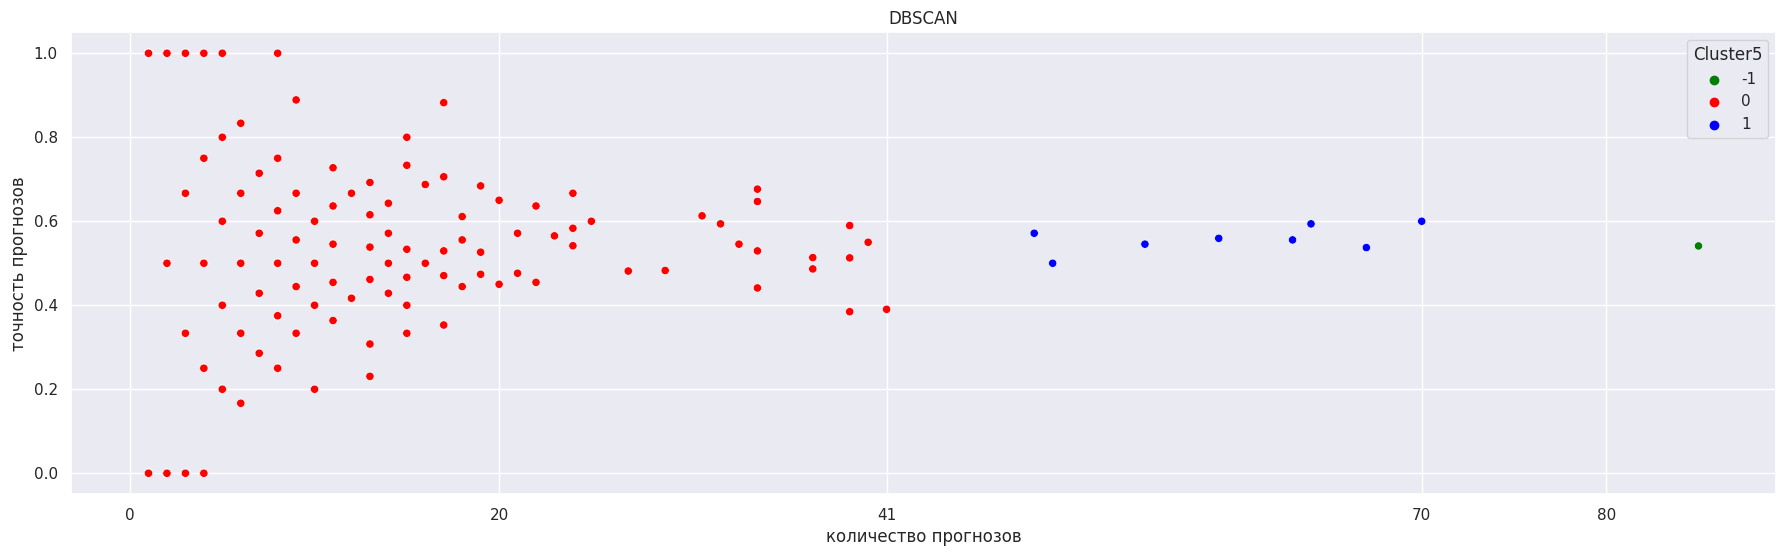

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 3).fit(X) # fitting the model
labels = dbscan.labels_ # getting the labels
X['Cluster5'] = labels



fig, ax = plt.subplots()
sns.scatterplot(x='total', y='accurate', data=X, hue='Cluster5', ax=ax, palette=['green','red','blue']).set_xticks([0,20,41,70,80])
plt.ylabel("точность прогнозов")
plt.xlabel("количество прогнозов")
ax.set(title='DBSCAN')

# distribution

In [ ]:
pip install fitter

In [ ]:
from fitter import Fitter
f = Fitter(X)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

ModuleNotFoundError: ignored

In [ ]:
X.columns

In [ ]:
X

In [ ]:
z = X.loc[:,['total', 'accurate']]

In [ ]:
z = X.loc[:,['accurate']]

In [ ]:
from fitter import Fitter
f = Fitter(z)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [ ]:
z

In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(z, *['accurate'], **{})
chart

In [ ]:
z = X[X.total>8]
z

In [ ]:
z = z.loc[:,['accurate']]
z

In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(z, *['accurate'], **{})
chart

In [ ]:
from fitter import Fitter
f = Fitter(z)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

# чуть большие данные)))

https://www.kaggle.com/datasets/danmcinerney/mma-differentials-and-elo

About Dataset
MMA-AI.net

This dataset uses ufcstats.com. For each fight, we calculated the technique differential between the opponents and also the fighter's historical average technique differential.

Differential stats are calculated by diving the two individual's technique stats. For example, if Conor hits Khabib 10 times, and Khabib hits Conor 5 times, then Conor's differential stat is 10/5 = 2. Khabib's differential stat is 0.5.

This dataset tracks the following basic stats:

date
fight_url
event_url
result
fighter
opponent
division
stance
dob
method
total_comp_time
round
time
fighter_url
opponent_url
referee
time_format
reach
height
age
knockdowns
sub_attempts
reversals
control
takedowns_landed
takedowns_attempts
sig_strikes_landed
sig_strikes_attempts
total_strikes_landed
total_strikes_attempts
head_strikes_landed
head_strikes_attempts
body_strikes_landed
body_strikes_attempts
leg_strikes_landed
leg_strikes_attempts
distance_strikes_landed
distance_strikes_attempts
clinch_strikes_landed
clinch_strikes_attempts
ground_strikes_landed
ground_strikes_attempts
KO_losses
days_since_last_comp
lose_streak
win_streak
win_loss_ratio
total_comp_time
stamina
num_fights
trueskill
elo
It then parses those stats starting at reach and creates several new categories for each:

stat_differential
stat_per_min
stat_accuracy
stat_def
stat_peak
stat_valley
stat_vs_peak
stat_vs_valley
Then it further modifies those categories above with:

avg_stat
recent_avg_stat
Then for each of those it does:

change_stat
stat_vs_opp
Exploring the data

See all of Jon Jones' stats
df.loc[df['fighter'] == 'jon jones']

See all of Jon Jones' striking differential stats
df.loc[df['fighter'] == 'jon jones'].filter(like='sig_strikes_differential')

See Jon Jones' postfight Elo scores and who his opponents were
df.loc[df['fighter'] == 'jon jones'].loc[:, ['opponent', 'elo']]

See Jon Jones' postfight ground control time, average ground control, and peak ground control
df.loc[df['fighter'] == 'jon jones'].loc[:, ['opponent', 'control', 'avg_control', 'control_peak']]

See Jon Jones' prefight average ground control vs his opponent's average ground control
df.loc[df['fighter'] == 'jon jones'].loc[:, ['opponent', 'precom_avg_control_vs_opp']]

In [ ]:
url =  "https://drive.google.com/file/d/1vug2SdRcH9aj831C3RQymHBnykCmzzNI/view?usp=drive_link"

In [ ]:
!wget "https://drive.google.com/file/d/1vug2SdRcH9aj831C3RQymHBnykCmzzNI/view?usp=drive_link"  -P "/content/drive/My Drive/imgcaptiongen/data"

In [ ]:
!gdown --id 1vug2SdRcH9aj831C3RQymHBnykCmzzNI

In [ ]:
bds = pd.read_csv('/content/masterMLpublic.csv')

In [ ]:
print(bds.columns)

In [ ]:
bds.loc[bds['fighter'] == 'jon jones']

See all of Jon Jones' striking differential stats

In [ ]:
bds.loc[bds['fighter'] == 'jon jones'].filter(like='sig_strikes_differential')

See Jon Jones' postfight Elo scores and who his opponents were

In [ ]:
bds.loc[bds['fighter'] == 'jon jones'].loc[:, ['opponent', 'elo']]

See Jon Jones' postfight ground control time, average ground control, and peak ground control

In [ ]:
bds.loc[bds['fighter'] == 'jon jones'].loc[:, ['opponent', 'control', 'avg_control', 'control_peak']]

See Jon Jones' prefight average ground control vs his opponent's average ground control

In [ ]:
bds.loc[bds['fighter'] == 'jon jones'].loc[:, ['opponent', 'precom_avg_control_vs_opp']]